In [129]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas

# Import the K-means algorithm
from sklearn.cluster import KMeans
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score


## Split the Data into Training and Testing Sets

### Step 1: Read the `neighborhood.csv` data into a Pandas DataFrame.

In [130]:
# Read in the CSV file as a Pandas DataFrame
home_prediction = pd.read_csv(Path("neighborhoods.csv"))

# Review the DataFrame
home_prediction.head()


,RegionID,Neighborhood,State,City,Metro,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,118208,South Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,506642.0,502524.0,497331.0,493370.0,...,671146.0,674242.0,677691.0,678758.0,679208.0,677960.0,677351.0,674928.0,667856.0,658327.0
1,268496,Southeast Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,425679.0,422895.0,418987.0,416306.0,...,569715.0,572643.0,576533.0,579171.0,580886.0,580609.0,580315.0,578471.0,573768.0,566632.0
2,273565,East San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,793552.0,786114.0,777802.0,770834.0,...,978476.0,979334.0,974156.0,965418.0,955752.0,946936.0,941145.0,937052.0,930206.0,919784.0
3,273088,Bullard,CA,Fresno,"Fresno, CA",Fresno County,323923.5,326059.5,328003.5,329031.5,...,456946.5,461154.0,462796.0,461944.0,459337.5,456939.5,454922.5,452773.0,449136.5,446411.0
4,276652,West San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,1457490.0,1434139.0,1408370.0,1385831.0,...,1803243.0,1804447.0,1792097.0,1773101.0,1753691.0,1741227.0,1739328.0,1741457.0,1735428.0,1714749.0


In [131]:
# Remove the RegionID and State columns
home_prediction_df = home_prediction.drop(columns = ['RegionID','State'])
home_prediction_df.head(5)


,Neighborhood,City,Metro,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,South Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,506642.0,502524.0,497331.0,493370.0,490663.0,488695.0,...,671146.0,674242.0,677691.0,678758.0,679208.0,677960.0,677351.0,674928.0,667856.0,658327.0
1,Southeast Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,425679.0,422895.0,418987.0,416306.0,414891.0,413916.0,...,569715.0,572643.0,576533.0,579171.0,580886.0,580609.0,580315.0,578471.0,573768.0,566632.0
2,East San Jose,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,793552.0,786114.0,777802.0,770834.0,765129.0,759231.0,...,978476.0,979334.0,974156.0,965418.0,955752.0,946936.0,941145.0,937052.0,930206.0,919784.0
3,Bullard,Fresno,"Fresno, CA",Fresno County,323923.5,326059.5,328003.5,329031.5,329221.5,329165.0,...,456946.5,461154.0,462796.0,461944.0,459337.5,456939.5,454922.5,452773.0,449136.5,446411.0
4,West San Jose,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,1457490.0,1434139.0,1408370.0,1385831.0,1368964.0,1353640.0,...,1803243.0,1804447.0,1792097.0,1773101.0,1753691.0,1741227.0,1739328.0,1741457.0,1735428.0,1714749.0


## Prepare the Data to Fit the Linear Regression Model

In [132]:
# Create the X set by using the `reshape` function to format the historical prices data as a single column array.
x = home_prediction_df.drop(columns=[
    'Neighborhood', 'City', 'Metro', 'County', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28'])



In [133]:
# Create an array for the dependent variable y with the 2023_02_28 data
y = home_prediction_df['2023-02-28']


In [134]:
# Split the Dataset into Train Set and Test Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [135]:
# View the shapes of splitter data.

#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1557, 38)
X_test: (519, 38)
Y_train: (1557,)
Y_test: (519,)


## Build and Train the Linear Regression Model

In [136]:
# From the sklearn module, use the LinearRegression() to create a linear regression object
regr = linear_model.LinearRegression()

# Fit the model, taking the independent and dependent values as parameters
# filling the regression object with data that describes the relationship, and ready to make the predictions:
regr.fit(x_train, y_train)


LinearRegression()

In [137]:
# Display the slopes
print(f"Model's slope: {regr.coef_}")


Model's slope: [ -0.93568153  -1.10280371   4.87040611  -5.71209745   5.75960219
  -0.10061859  -8.27014481   9.35487611  -3.88118298  -6.97994197
  10.01317851   4.0483518  -20.50579367  20.94150001  -3.34863182
 -14.0751636   14.78287577  -5.41487689  -6.74658596  16.73814881
 -12.58850313  -4.71758521  18.55033674 -18.32185131   6.11443982
  12.23577679 -20.01412049  11.95139109   3.85491533 -15.10570355
   9.63962619   7.43145967 -19.84377989  13.69443269   2.35875161
  -9.33573312   3.51587913   2.05949229]


In [138]:
# Display the y-intercept
print(f"Model's y-intercept: {regr.intercept_}")

Model's y-intercept: 21257.037140796892


In [139]:
# Display the model's best fit line formula
print(f"Model's formula: y = {regr.intercept_} + {regr.coef_[0]}X")


Model's formula: y = 21257.037140796892 + -0.9356815288717507X


In [140]:
# Make predictions using the X set
predicted2023_02_28 = regr.predict(x_test)
predicted2023_02_28


array([ 329950.28577087, 1011395.35588159,  880736.00163062,
        885441.01417864,  800813.8988563 , 1064145.93722246,
       1349731.78604234, 1285959.96678716, 1101779.60633679,
        591937.80653772,  890498.63290315,  676458.34665707,
        603368.85242473,  412752.55975786, 1157109.6776225 ,
        653810.61606481,  862645.16010095, 1159894.01823149,
        356214.84877245, 2607484.27847326, 1403591.89917646,
        533921.91773186,  525206.70815595,  889671.73757547,
        811626.36890734,  839668.61674856,  752712.35279657,
       1361363.76667579,  434156.16310476,  834469.53093898,
       7532770.77522477,  430747.27623863, 1389817.74132675,
        998795.54920916, 1551708.23682121, 2920409.64752442,
        690296.07675832,  178905.43431215,  335437.62553443,
        553570.29964506,  479083.87323945, 1153612.04196905,
        533618.33400794,  488017.50458275, 2227519.42838831,
        704219.23107573,  325016.50939157, 1400088.94993085,
        425331.25837487,

## Plot the Results

Text(0, 0.5, 'Predicted')

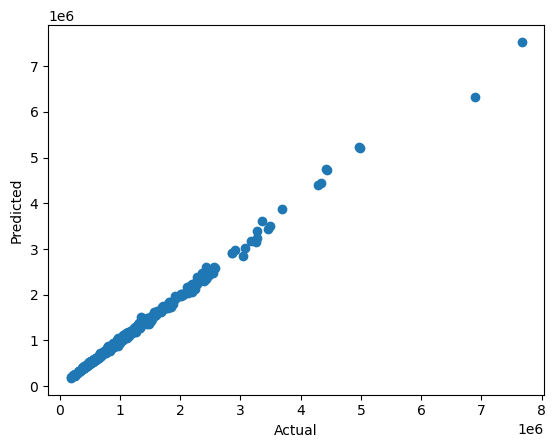

In [141]:
plt.scatter(y_test, predicted2023_02_28)
plt.xlabel('Actual')
plt.ylabel('Predicted')


<AxesSubplot:xlabel='2023-02-28'>

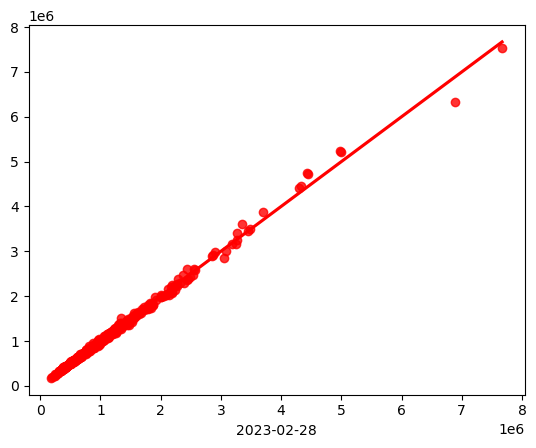

In [142]:
# Plot the regression line of the model

sns.regplot(x=y_test,y=predicted2023_02_28,ci=None,color ='red')

## Compare the predicted values vs. the actual values

In [143]:
# Create a copy of the original data
home_sales_predicted = home_prediction_df.copy()


In [144]:
# Since the round function is not supported in a NumPy array
# create an empty list and loop through the results of the regression model prediction
# # Append the rounded values to an empty list
predicted_prices = []
for i in range(len(predicted2023_02_28)):
    rounded_value = round(predicted2023_02_28[i], 1)
    home_sales_predicted.loc[i, "2023_02_28_predicted"] = rounded_value
    predicted_prices.append(rounded_value)

print(predicted_prices)


[329950.3, 1011395.4, 880736.0, 885441.0, 800813.9, 1064145.9, 1349731.8, 1285960.0, 1101779.6, 591937.8, 890498.6, 676458.3, 603368.9, 412752.6, 1157109.7, 653810.6, 862645.2, 1159894.0, 356214.8, 2607484.3, 1403591.9, 533921.9, 525206.7, 889671.7, 811626.4, 839668.6, 752712.4, 1361363.8, 434156.2, 834469.5, 7532770.8, 430747.3, 1389817.7, 998795.5, 1551708.2, 2920409.6, 690296.1, 178905.4, 335437.6, 553570.3, 479083.9, 1153612.0, 533618.3, 488017.5, 2227519.4, 704219.2, 325016.5, 1400088.9, 425331.3, 774941.6, 563013.9, 559799.7, 639658.1, 1365129.3, 266246.3, 426792.6, 3401423.6, 1216067.8, 554555.9, 668190.2, 583284.0, 939873.2, 579718.7, 1109555.0, 775397.0, 6330378.2, 1400905.0, 842411.5, 1435902.4, 831744.2, 937590.0, 561430.8, 738589.5, 748753.0, 4730541.6, 1291648.3, 775822.9, 1518557.7, 949913.1, 1736900.7, 1106027.2, 840659.0, 466052.7, 485459.3, 931582.4, 1462259.5, 1188570.7, 1758654.3, 337821.4, 693825.4, 634770.6, 4411521.0, 732415.0, 1981432.3, 1101751.1, 1123318.5, 638

In [145]:
# Compare the Predicted Values and the Actual Values, Noting Also the Differences
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predicted_prices,'Difference': y_test-predicted_prices})
pred_df

,Actual Value,Predicted Value,Difference
1721,323912.0,329950.3,-6038.3
1857,1050100.5,1011395.4,38705.1
861,901397.0,880736.0,20661.0
76,884308.0,885441.0,-1133.0
759,767423.0,800813.9,-33390.9
...,...,...,...
1356,481589.0,489811.9,-8222.9
159,3077241.0,3011752.3,65488.7
906,1398334.0,1377218.7,21115.3
318,552820.0,530920.6,21899.4


## Evaluate the Model

In [146]:
# Compute the metrics for the linear regression model
r2 = round(r2_score(y_test, predicted2023_02_28)*100,2)
Accuracy = r2_score(y_test, predicted2023_02_28)*100

mse = round(mean_squared_error(y_test, predicted2023_02_28),2)
rmse = round(np.sqrt(mse),2)
std = round(np.std(y_test),2)

# Print releveant metrics.
print(" The accuracy of the model is %.2f" % Accuracy)
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


 The accuracy of the model is 99.63
The r2 is 99.63.
The mean squared error is 2506880219.72.
The root mean squared error is 50068.75.
The standard deviation is 818406.83.


#### The above metrics reflect that the model is a good model since the standard deviation is greater than the root mean squared error
#### And the regression coefficient of approximately 99.6%  expresses the high explanatory power of the model in forecasting home prices